# Introduction

A food delivery app has just hired you as a data analyst. It coordinates orders from different restaurants to customers in New York City. They have only been in operation a month and need more visibility into their business.

The founder would like to know what insights you can extract from the data. For example:
- Are there many repeat customers?
- Do repeat customers like to try different cuisines, or do they have favorite restaurant types?
- Is there a relationship between how long it takes to deliver a meal and the customer's rating?

They would also like to know your recommendations based on what you find. What does the data suggest their next steps should be?

[Source](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset) of dataset.

## Data Preparation

In [49]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('/Users/ryanrichardson/VSCode Projects/food_order.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


There are 1898 rows with 9 attributes. Deeper examination of the data will need to be conducted to ensure cleanliness.

In [ ]:
print('There are', df.customer_id.nunique(), 'unique customers - this will be examined in more detail later.',
      'As expected, there are', df.order_id.nunique(), "unique order id's - one for each row.")

There are 1200 unique customers - this will be examined in more detail later. As expected, there are 1898 unique order id's - one for each row.


In [ ]:
df.restaurant_name.unique()


array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

Many of these names appear incorrect. These should be fixed:

In [ ]:

badNames = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
goodNames = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China']

# Get index values of bad names
for i, name in enumerate(badNames):
  
  value = df[df['restaurant_name'] == name].index

# Replace bad names with good names
  for x in value:

    df.loc[x,'restaurant_name'] = goodNames[i]


# Standardize names
df['restaurant_name'] = df['restaurant_name'].apply(lambda x : x.strip().capitalize())

# checking restaurant names again for verifying changes
df.restaurant_name.unique()


array(['Hangawi', 'Blue ribbon sushi izakaya', 'Cafe habana',
       'Blue ribbon fried chicken', 'Dirty bird to go',
       'Tamarind tribeca', 'The meatball shop', 'Barbounia',
       'Anjappar chettinad', 'Bukhara grill', 'Big wong restaurant',
       'Empanada mama', 'Pylos', "Lucky's famous burgers", 'Shake shack',
       'Sushi of gari', 'Redfarm hudson', 'Blue ribbon sushi',
       'Five guys burgers and fries', 'Tortaria', 'Cafe mogador',
       'Otto enoteca pizzeria', 'Vezzo thin crust pizza',
       'Sushi of gari 46', 'The kati roll company', 'Klong',
       '5 napkin burger', 'Tao', 'Parm', 'Sushi samba',
       'Haru gramercy park', 'Chipotle mexican grill', 'Redfarm broadway',
       'Cafeteria', 'Dumont burger', "Sarabeth's east",
       'Hill country fried chicken', 'Bistango', "Jack's wife freda",
       "Mamoun's falafel", 'Prosperity dumpling',
       'Blue ribbon sushi bar & grill', 'Westville hudson',
       'Blue ribbon brooklyn', 'Nobu next door', 'Osteria morin

In [ ]:
df.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

This looks normal.

In [ ]:
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

This appears to be reasonable as well.

In [ ]:
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

The day_of_the_week column also appears to be fine.

In [ ]:
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

This would be better as an integer with NA values.

In [ ]:
df.rating = df.rating.apply(pd.to_numeric, args=('coerce',)).astype('Int64')
print(df.rating.dtype, df.rating.unique())

Int64 <IntegerArray>
[<NA>, 5, 3, 4]
Length: 4, dtype: Int64


In [ ]:
print(df.rating.isna().sum())
print(df.rating.describe())

736
count      1162.0
mean     4.344234
std      0.741478
min           3.0
25%           4.0
50%           5.0
75%           5.0
max           5.0
Name: rating, dtype: Float64


There are an unfortunately high number of NA values in this column. This can be examined more in detail later.

In [ ]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

It would also be helpful to have another calculated column: total_time_from_order.

In [ ]:
df['total_time_from_order'] = df.delivery_time + df.food_preparation_time
df.total_time_from_order.describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: total_time_from_order, dtype: float64

## Exploratory Data Analysis

In [ ]:
df[['order_id', 'customer_id']] = df[['order_id', 'customer_id']].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time_from_order  1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(3), object(5)
memory usage: 150.3+ KB
None


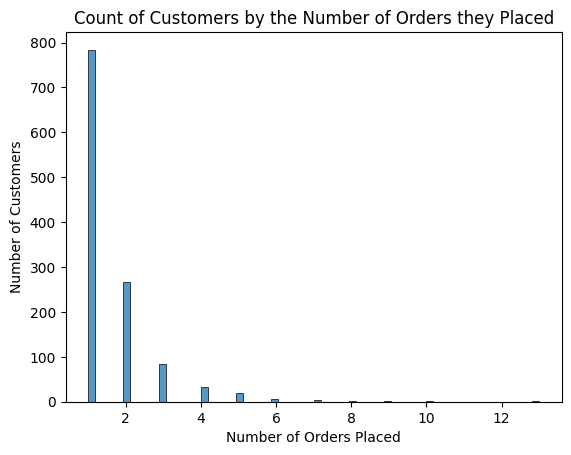

In [ ]:
repCust = df.customer_id.value_counts(ascending=False)
sns.histplot(repCust)
plt.xlabel('Number of Orders Placed')
plt.ylabel('Number of Customers')
plt.title('Count of Customers by the Number of Orders they Placed')
plt.show()


In [ ]:
print('There are', df.customer_id.nunique(), 'total unique customers, and only', len(repCust[repCust > 1]), 'repeat customers.', 
      len(repCust[repCust == 1]), 'customers have not placed a second order.')

There are 1200 total unique customers, and only 416 repeat customers. 784 customers have not placed a second order.


In [ ]:
repeats_df = df[df.duplicated(subset=['customer_id'], keep=False)]
one_timers_df = df.drop_duplicates(subset=['customer_id'], keep=False)

# Data sanity checks:
print('Repeated customers data frame shape:', repeats_df.shape, 'and number of repeated customers:' , repeats_df.customer_id.nunique())
print('One time customers data frame shape:', one_timers_df.shape, 'and number of one-time customers:', one_timers_df.customer_id.nunique())

Repeated customers data frame shape: (1114, 10) and number of repeated customers: 416
One time customers data frame shape: (784, 10) and number of one-time customers: 784


The differences between these customers can now be more easily compared:

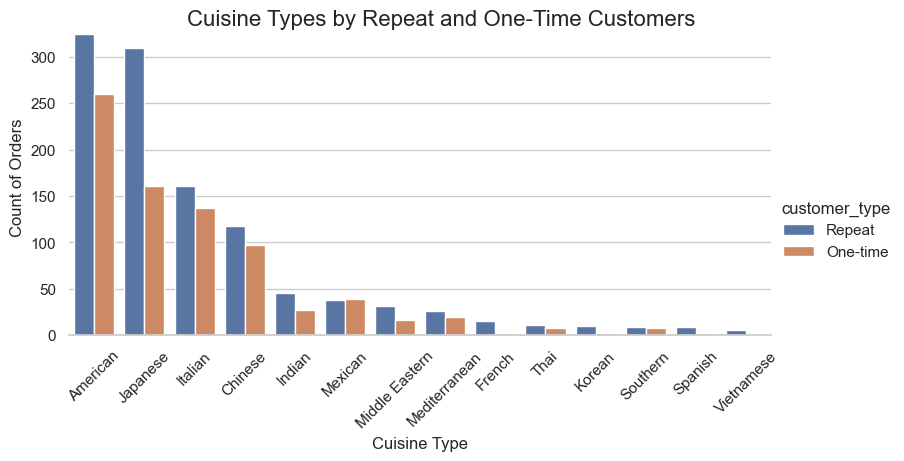

In [ ]:
# Compute value counts for cuisine types in each DataFrame
repeat_cuisine_counts = repeats_df['cuisine_type'].value_counts()
one_time_cuisine_counts = one_timers_df['cuisine_type'].value_counts()

# Create a new DataFrame with the combined data and count column
combined_cuisine_counts = pd.DataFrame({
    'cuisine_type': repeat_cuisine_counts.index.tolist() + one_time_cuisine_counts.index.tolist(),
    'count': repeat_cuisine_counts.values.tolist() + one_time_cuisine_counts.values.tolist(),
    'customer_type': ['Repeat'] * len(repeat_cuisine_counts) + ['One-time'] * len(one_time_cuisine_counts)
})

# Create the joint plot with subplots
sns.set(style="whitegrid")
g = sns.catplot(x="cuisine_type", y="count", hue="customer_type", data=combined_cuisine_counts,
                kind="bar", height=4, aspect=2)
g.despine(left=True)
g.set_axis_labels("Cuisine Type", "Count of Orders")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Cuisine Types by Repeat and One-Time Customers', fontsize=16)
plt.show()


Largely, the cuisine preferences between one time or repeat customers is the same. The order count is naturally less for one-time customers, but ratios are roughly similar, although, proportionally, repeat customers order more Japanese cuisine.

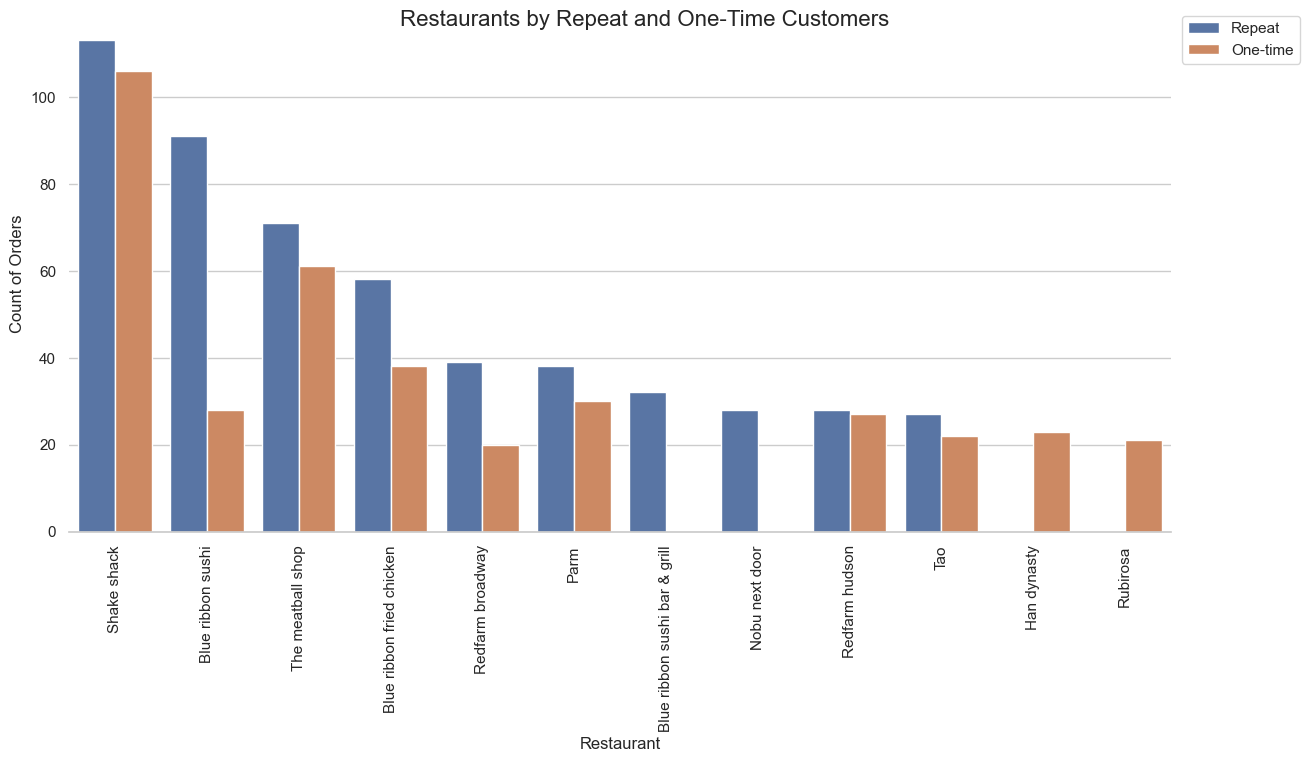

In [ ]:
# Compute value counts for restaurants in each DataFrame
repeat_restaurant_counts = repeats_df['restaurant_name'].value_counts().head(
    10)
one_time_restaurant_counts = one_timers_df['restaurant_name'].value_counts(
).head(10)

# Create a new DataFrame with the combined data and count column
combined_restaurant_counts = pd.DataFrame({
    'restaurant_name': repeat_restaurant_counts.index.tolist() + one_time_restaurant_counts.index.tolist(),
    'count': repeat_restaurant_counts.values.tolist() + one_time_restaurant_counts.values.tolist(),
    'customer_type': ['Repeat'] * len(repeat_restaurant_counts) + ['One-time'] * len(one_time_restaurant_counts)
})

# Create the joint plot with subplots
sns.set(style="whitegrid")
g = sns.catplot(x="restaurant_name", y="count", hue="customer_type", data=combined_restaurant_counts,
                kind="bar", height=6, aspect=2)
g.despine(left=True)
g.set_axis_labels("Restaurant", "Count of Orders")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.fig.suptitle('Restaurants by Repeat and One-Time Customers', fontsize=16)
# Remove the original legend
g._legend.remove()
# Create a new legend and shift it down
handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles, labels, bbox_to_anchor=(
    1.01, 1), loc='upper left', borderaxespad=0.)

plt.show()


Many of the restaurants between repeat and one-time customers on this list also overlap, although Blue Ribbon Sushi (and Blue Ribbon Sushi Bar & Grill? Is this a different restaurant?) garners many more repeat customers than not. Additionally, Nobu Next Door also generated some extra business as well.

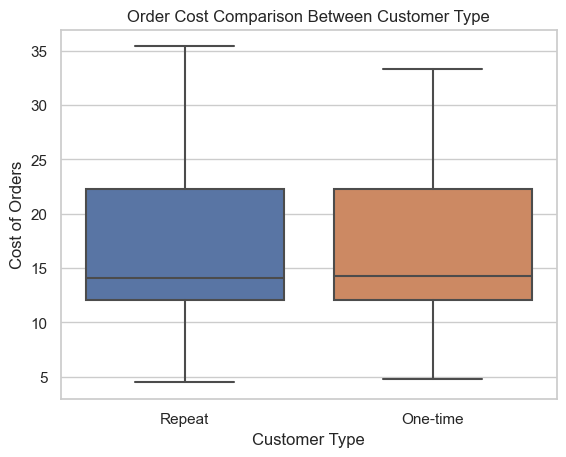

In [ ]:
#Create categories for repeat and One-time customers
repeats_df = repeats_df.copy()
repeats_df['customer_type'] = 'Repeat'
one_timers_df = one_timers_df.copy()
one_timers_df['customer_type'] = 'One-time'

#Now bring this new column into the original data frame
df = pd.concat([repeats_df, one_timers_df])

sns.set(style="whitegrid")
sns.boxplot(x='customer_type', y='cost_of_the_order', data=df)

plt.title('Order Cost Comparison Between Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cost of Orders')

plt.show()


There is minimal difference in order cost between repeat customers and one-time customers.

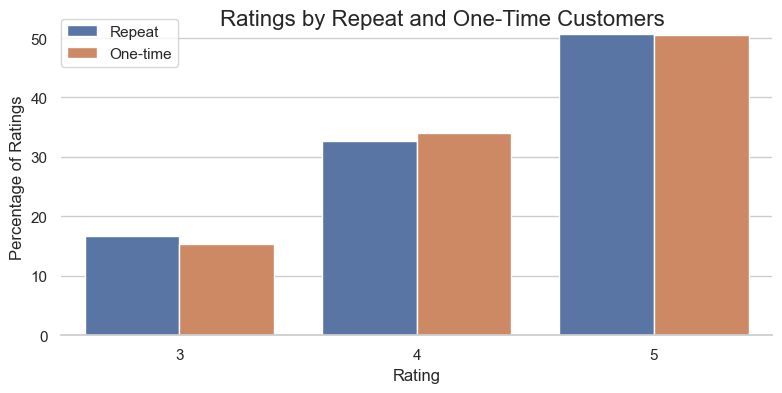

In [ ]:
# Compute value counts for cuisine types in each DataFrame
repeat_rating_counts = repeats_df['rating'].value_counts()
one_time_rating_counts = one_timers_df['rating'].value_counts()

# Create a new DataFrame with the combined data and count column
combined_rating_counts = pd.DataFrame({
    'rating': repeat_rating_counts.index.tolist() + one_time_rating_counts.index.tolist(),
    'count': repeat_rating_counts.values.tolist() + one_time_rating_counts.values.tolist(),
    'customer_type': ['Repeat'] * len(repeat_rating_counts) + ['One-time'] * len(one_time_rating_counts)
})

# Calculate the total count of each customer type
total_count = combined_rating_counts.groupby('customer_type')['count'].sum()

# Calculate the percentage of each rating for each customer type
combined_rating_counts['percent'] = combined_rating_counts.apply(lambda x: x['count'] / total_count[x['customer_type']] * 100, axis=1)

# Create the joint plot with subplots
sns.set(style="whitegrid")
g = sns.catplot(x="rating", y="percent", hue="customer_type", data=combined_rating_counts,
                kind="bar", height=4, aspect=2)
g.despine(left=True)
g.set_axis_labels("Rating", "Percentage of Ratings")
g.set_titles("{col_name}")
g.fig.suptitle('Ratings by Repeat and One-Time Customers', fontsize=16)
g._legend.remove()
# Create a new legend and shift it down
handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles, labels, bbox_to_anchor=(
    0, 1), loc='upper left', borderaxespad=0.)
plt.show()


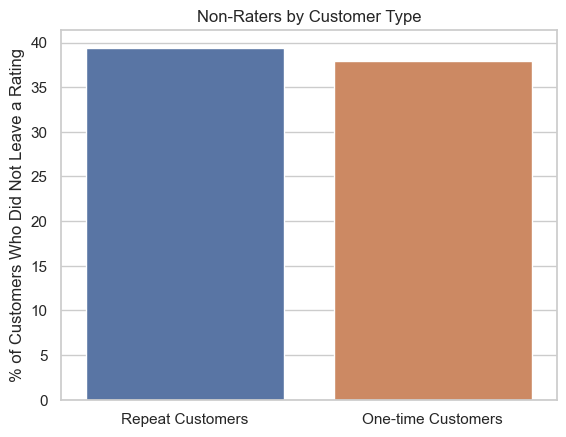

In [ ]:
# Compute the percentage of each customer type who did not leave a rating
repeat_non_rater_pct = repeats_df['rating'].isna().sum()/len(repeats_df) * 100
one_time_non_rater_pct = one_timers_df['rating'].isna().sum()/len(one_timers_df) * 100

# Create a bar plot showing the percentage of each customer type who did not leave a rating
sns.set(style="whitegrid")
g = sns.barplot(x=["Repeat Customers", "One-time Customers"],
                y=[repeat_non_rater_pct, one_time_non_rater_pct])
g.set(ylabel='% of Customers Who Did Not Leave a Rating',
      title='Non-Raters by Customer Type')
plt.show()


There is virtually no different in the proportion of ratings between customer types. Just shy of 40% of both repeat and one-time customers did not leave a rating, and the percentages of those that did leave a rating is almost identical as well.

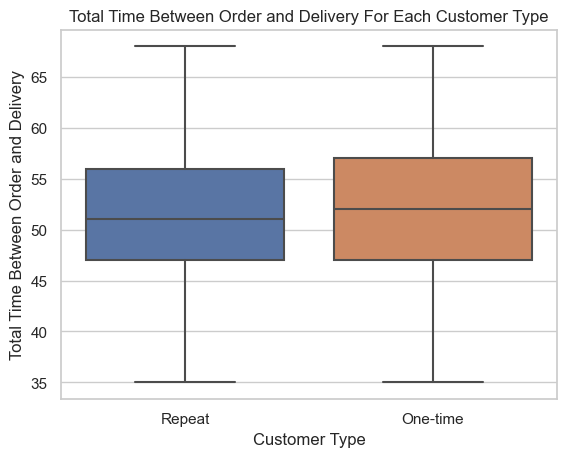

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x='customer_type', y='total_time_from_order', data=df)

plt.title('Total Time Between Order and Delivery For Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Time Between Order and Delivery')

plt.show()

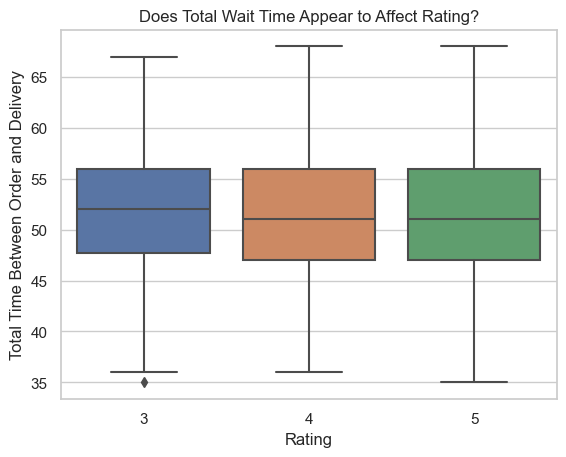

In [ ]:
# Create a copy of the dataframe
df_no_na_ratings = df.copy()

# Drop rows where rating is NA
df_no_na_ratings = df_no_na_ratings.dropna(subset=['rating'])

# Plot the boxplot
sns.set(style="whitegrid")
sns.boxplot(x='rating', y='total_time_from_order', data=df_no_na_ratings)
plt.title('Does Total Wait Time Appear to Affect Rating?')
plt.xlabel('Rating')
plt.ylabel('Total Time Between Order and Delivery')
plt.show()


Interestingly, total wait time does not appear to affect rating.

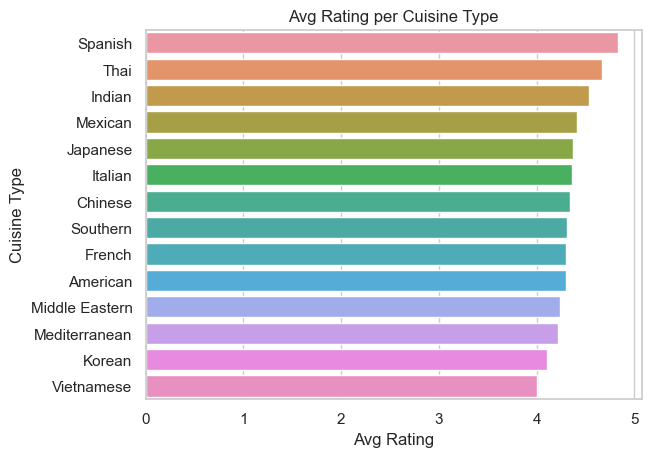

In [ ]:
# computing avg rating per cuisine type using original rating dataframe
cuisine_type_ratings = df.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False).reset_index()

cuisine_type_ratings = cuisine_type_ratings.dropna(subset='rating')

# checking barplot of avg rating per cuisine type 
sns.barplot(data=cuisine_type_ratings, y='cuisine_type', x='rating')
plt.xlabel('Avg Rating')
plt.ylabel('Cuisine Type')
plt.title('Avg Rating per Cuisine Type')
plt.show()

There is a fairly smooth downward curve between 5 and 4 for the average rating for different cuisine types. Nevertheless, Spanish, Thai, and Indian food appear to be the favored cuisines. It should be re-emphasized that, as seen above, the sample sizes for these cuisines is small compared to other cuisine options. Of the more common cuisines, Japanese is the highest rated cuisine type.

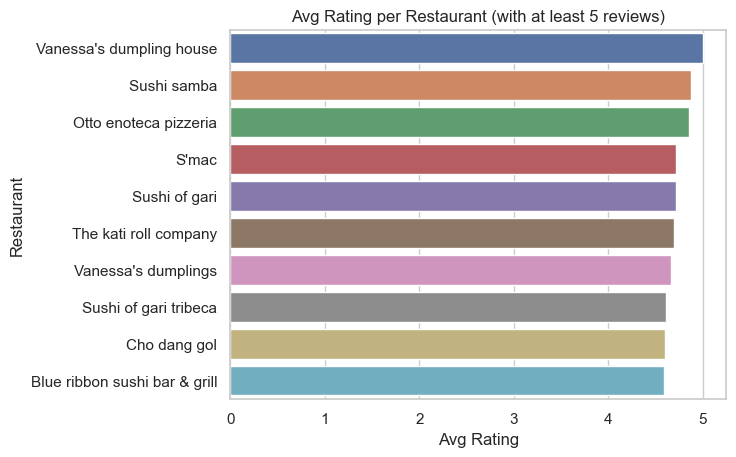

In [ ]:
# computing avg rating per restaurant
restaurant_ratings = df.groupby(['restaurant_name'])['rating'].agg(['mean', 'count']).reset_index()

# filter for restaurants with at least 2 reviews
restaurant_ratings = restaurant_ratings[restaurant_ratings['count'] >= 5]

# sort by average rating
restaurant_ratings = restaurant_ratings.sort_values('mean', ascending=False)

# select top 50 rated restaurants
top10_rated_restaurants = restaurant_ratings.head(10)

# plot barplot of avg rating per restaurant
sns.barplot(data=top10_rated_restaurants, y='restaurant_name', x='mean')
plt.xlabel('Avg Rating')
plt.ylabel('Restaurant')
plt.title('Avg Rating per Restaurant (with at least 5 reviews)')
plt.show()


Many restaurants have a mean of 5 star reviews (47 of the top 50 to be precise), filtering this to identify restaurants with at least 5 reviews that appeal to a wider audience is more helpful. Vanessa's Dumpling House is particularly well liked. Blue Ribbon Sushi also makes an appearance on this list as well.

## Exploratory Introductory Insights

This introductory analysis is too brief to draw firm conclusions, but at first glance there appear to be a few opportunities to drive customer retention. There are substantially more one-time customers than repeat customers. While multivariate analysis reveals many similar behaviours and shared attributes, a couple of opportunities stand out. Notably, a few Japanese restaurants appear to drive repeat customers - particularly Blue Ribbon Sushi - which also has consistently high reviews. Without deeper analysis, I would suggest running a promotional campaign on this restaurant to see if it does indeed drive customer retention. 

Ideally, follow up analysis would involve a more thorough statistical approach looking at correlations and running predictive models to predict repeat customers. Identifying contributing variables could be helpful to formulate follow up strategy.